- Author: Maximiliano Lopez Salgado
- First Commit: 13.06.2023
- Last Commit: 13.06.2023
- Description: This notebook is used to perform EDA on the Brazilian E-commerce dataset

In [37]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Exploratory Data Analysis (EDA)

## 1. Understanding the data

### 1.1 Gathering data

In [48]:
# import csv files 
cleaned_customers = pd.read_csv('../datasets/cleaned_customers.csv')
cleaned_order_items = pd.read_csv('../datasets/cleaned_order_items.csv')
cleaned_order_payments = pd.read_csv('../datasets/cleaned_order_payments.csv')
cleaned_order_reviews = pd.read_csv('../datasets/cleaned_order_reviews.csv')
cleaned_orders_data = pd.read_csv('../datasets/cleaned_orders_data.csv')
cleaned_products_dataset = pd.read_csv('../datasets/cleaned_products_dataset.csv')
cleaned_sellers_data = pd.read_csv('../datasets/cleaned_sellers_data.csv')
cleaned_product_category_name_translation = pd.read_csv('../datasets/cleaned_product_category_name_translation.csv')

### 1.2 Assesing data

In [49]:
# take a look of the data´s shape
display(cleaned_customers.shape)
display(cleaned_order_items.shape)
display(cleaned_order_payments.shape)
display(cleaned_order_reviews.shape)
display(cleaned_orders_data.shape)
display(cleaned_products_dataset.shape)
display(cleaned_sellers_data.shape)
display(cleaned_product_category_name_translation.shape)

(99441, 5)

(112650, 7)

(103886, 5)

(99224, 5)

(99441, 8)

(32951, 9)

(3095, 4)

(71, 2)

In [50]:
# take a look of the data´s info
display(cleaned_customers.info())
display(cleaned_order_items.info())
display(cleaned_order_payments.info())
display(cleaned_order_reviews.info())
display(cleaned_orders_data.info())
display(cleaned_products_dataset.info())
display(cleaned_sellers_data.info())
display(cleaned_product_category_name_translation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  object 
 8   product_width_cm            32951 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

In [51]:
# use describe method to get descriptive statistics
display(cleaned_customers.describe())
display(cleaned_order_items.describe())
display(cleaned_order_payments.describe())
display(cleaned_order_reviews.describe())
display(cleaned_orders_data.describe())
display(cleaned_products_dataset.describe())
display(cleaned_sellers_data.describe())
display(cleaned_product_category_name_translation.describe())

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2965,522


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,23.196728
std,10.150458,629.208849,1.720614,4281.908773,16.913945,12.078681
min,5.000000,4.000000,1.000000,0.000000,7.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,15.000000
50%,51.000000,604.000000,1.000000,700.000000,25.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,118.000000


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## 2. Extracting and Plotting the data

From the dataframes we have, here are some potential information we can extract:

**DataFrame 1: Customer Data**
- Number of unique customers.
- Number of unique customer IDs.
- Distribution of customers across zip code prefixes and cities.
- Number of customers in each state.

**DataFrame 2: Order Data**
- Number of unique orders.
- Number of unique products.
- Number of unique sellers.
- Descriptive statistics of price and freight value.
- Distribution of orders based on shipping limit date.

**DataFrame 3: Payment Data**
- Number of unique payment types.
- Distribution of payment installments.
- Descriptive statistics of payment values.

**DataFrame 4: Review Data**
- Number of unique reviews.
- Distribution of review scores.
- Time-based analysis of review creation and answer timestamps.

**DataFrame 5: Order Details Data**
- Number of unique orders.
- Number of unique customers.
- Distribution of order statuses.
- Time-based analysis of order timestamps (purchase, approval, delivery, and estimation).

**DataFrame 6: Product Data**
- Number of unique products.
- Distribution of product categories.
- Descriptive statistics of product name length, description length, and photo quantity.
- Distribution of product weights, dimensions (length, height, width).

**DataFrame 7: Seller Data**
- Number of unique sellers.
- Distribution of sellers across zip code prefixes and cities.
- Number of sellers in each state.

**DataFrame 8: Product Category Data**
- Number of unique product categories.
- Mapping between Portuguese product category names and their English translations.


## DataFrame 1: Customer Data

### Number of unique customers

In [54]:
unique_customers = cleaned_customers['customer_unique_id'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 96096


### Number of unique customer IDs

In [55]:
unique_customer_ids = cleaned_customers['customer_id'].nunique()
print("Number of unique customer IDs:", unique_customer_ids)

Number of unique customer IDs: 99441


### Distribution of customers across zip code prefixes and cities

In [57]:
zip_code_counts = cleaned_customers['customer_zip_code_prefix'].value_counts().reset_index()
zip_code_counts.columns = ['Zip Code Prefix', 'Count']

city_counts = cleaned_customers['customer_city'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Display the distribution of zip code prefixes
print("Distribution of customers across zip code prefixes:")
print(zip_code_counts.head(10))

# Display the distribution of cities
print("\nDistribution of customers across cities:")
print(city_counts.head(10))

Distribution of customers across zip code prefixes:
   Zip Code Prefix  Count
0            22790    142
1            24220    124
2            22793    121
3            24230    117
4            22775    110
5            29101    101
6            13212     95
7            35162     93
8            22631     89
9            38400     87

Distribution of customers across cities:
                    City  Count
0              sao paulo  15540
1         rio de janeiro   6882
2         belo horizonte   2773
3               brasilia   2131
4               curitiba   1521
5               campinas   1444
6           porto alegre   1379
7               salvador   1245
8              guarulhos   1189
9  sao bernardo do campo    938


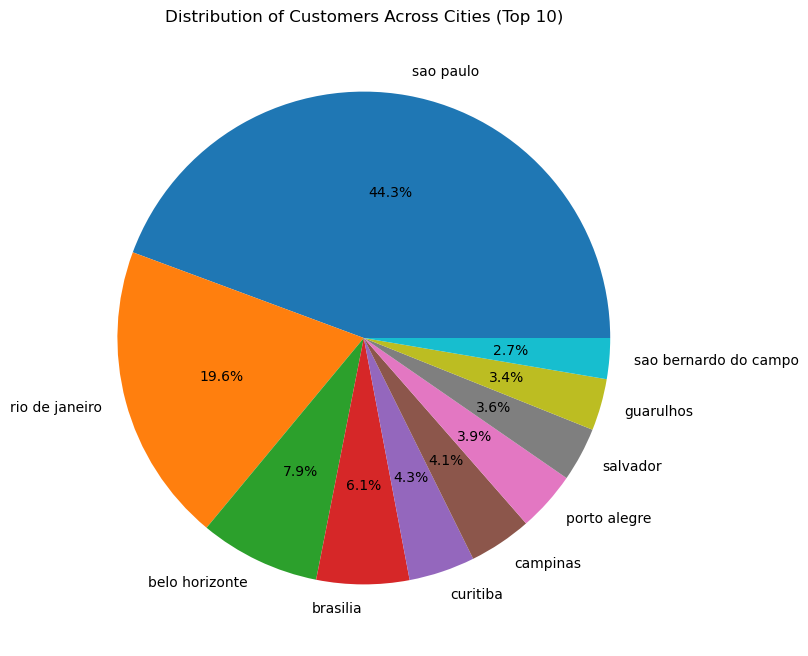

In [69]:
plt.figure(figsize=(8, 8))
plt.pie(city_counts['Count'][:10], labels=city_counts['City'][:10], autopct='%1.1f%%')
plt.title('Distribution of Customers Across Cities (Top 10)')
plt.show()

### Number of customers in each state

In [59]:
state_counts = cleaned_customers['customer_state'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

print("Number of customers in each state:")
print(state_counts.head(10))

Number of customers in each state:
  State  Count
0    SP  41746
1    RJ  12852
2    MG  11635
3    RS   5466
4    PR   5045
5    SC   3637
6    BA   3380
7    DF   2140
8    ES   2033
9    GO   2020


## DataFrame 2: Order Data

### Number of unique orders

In [71]:
unique_orders = cleaned_order_items['order_id'].nunique()
print("Number of unique orders:", unique_orders)

Number of unique orders: 98666


### Number of unique products

In [73]:
unique_products = cleaned_order_items['product_id'].nunique()
print("Number of unique products:", unique_products)

Number of unique products: 32951


### Number of unique sellers

In [74]:
unique_sellers = cleaned_order_items['seller_id'].nunique()
print("Number of unique sellers:", unique_sellers)

Number of unique sellers: 3095


### Descriptive statistics of price and freight value

In [75]:
price_stats = cleaned_order_items['price'].describe()
freight_stats = cleaned_order_items['freight_value'].describe()

print("Descriptive statistics of price:")
print(price_stats)

print("\nDescriptive statistics of freight value:")
print(freight_stats)

Descriptive statistics of price:
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

Descriptive statistics of freight value:
count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64


### Distribution of orders based on shipping limit date

In [76]:
shipping_limit_counts = cleaned_order_items['shipping_limit_date'].value_counts().reset_index()
shipping_limit_counts.columns = ['Shipping Limit Date', 'Count']

# Display the distribution of orders based on shipping limit date
print("Distribution of orders based on shipping limit date:")
print(shipping_limit_counts.head())

Distribution of orders based on shipping limit date:
   Shipping Limit Date  Count
0  2017-07-21 18:25:23     21
1  2018-03-01 02:50:48     21
2  2017-08-30 14:30:23     20
3  2017-02-03 21:44:49     15
4  2017-12-21 02:30:41     15


## DataFrame 3: Payment Data

### Number of unique payment types.

In [86]:
payment_type_counts = cleaned_order_payments['payment_type'].value_counts().reset_index()
payment_type_counts.columns = ['Payment Type', 'Count']

# Display the number of unique payment types with their names
print("Number of unique payment types:")
print(payment_type_counts)

Number of unique payment types:
  Payment Type  Count
0  credit_card  76795
1       boleto  19784
2      voucher   5775
3   debit_card   1529
4  not_defined      3


### Distribution of payment installments.

In [92]:
installments_distribution = cleaned_order_payments['payment_installments'].value_counts().sort_index()
installments_distribution.columns = ['Payment Installments', 'Count']

# Display the number of unique payment types with their names
print("Number of installments:")
print(installments_distribution)

Number of installments:
0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: payment_installments, dtype: int64


### Descriptive statistics of payment values.

In [93]:
payment_value_stats = cleaned_order_payments['payment_value'].describe()

# Display the descriptive statistics of payment values
print("Descriptive statistics of payment values:")
print(payment_value_stats)

Descriptive statistics of payment values:
count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64


## DataFrame 4: Review Data

In [ ]:
cleaned_order_reviews

### Number of unique reviews


### Distribution of review scores

### Time-based analysis of review creation and answer timestamps

In [ ]:
**DataFrame 4: Review Data**
- Number of unique reviews.
- Distribution of review scores.
- Time-based analysis of review creation and answer timestamps.

**DataFrame 5: Order Details Data**
- Number of unique orders.
- Number of unique customers.
- Distribution of order statuses.
- Time-based analysis of order timestamps (purchase, approval, delivery, and estimation).

**DataFrame 6: Product Data**
- Number of unique products.
- Distribution of product categories.
- Descriptive statistics of product name length, description length, and photo quantity.
- Distribution of product weights, dimensions (length, height, width).

**DataFrame 7: Seller Data**
- Number of unique sellers.
- Distribution of sellers across zip code prefixes and cities.
- Number of sellers in each state.

**DataFrame 8: Product Category Data**
- Number of unique product categories.
- Mapping between Portuguese product category names and their English translations.

## DataFrame 5: Order Details Data

In [ ]:
cleaned_orders_data


### Number of unique orders

### Number of unique customers

### Distribution of order statuses

### Time-based analysis of order timestamps (purchase, approval, delivery, and estimation)

## DataFrame 6: Product Data

### Number of unique products.
cleaned_products_dataset


### Distribution of product categories

### Descriptive statistics of product name length, description length, and photo quantity

### Distribution of product weights, dimensions (length, height, width)

## DataFrame 7: Seller Data

In [ ]:
### Number of unique sellers.
cleaned_sellers_data

### Distribution of sellers across zip code prefixes and cities

### Number of sellers in each state

## DataFrame 8: Product Category Data

In [ ]:
### Number of unique product categories.
cleaned_product_category_name_translationm

### Mapping between Portuguese product category names and their English translations